<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/3_3_1_2_obtencao_da__condicao__3_22_relacao_tensao_DC_MZM_Fig_3_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE RESULTS ARE TESTED IN

https://colab.research.google.com/drive/1EU1dDlVmjpHTSvGVl_U3emsOnEeXXvuE#scrollTo=81bFCHH1FM8E

In [29]:
import math
import numpy as np     # library for vector operation
from mpmath import *   # library for bessel functio
import matplotlib.pyplot as plt
from google.colab import files
import csv

Vpi_mz1  = 2.4
up_m  = up_2 = 19

up_4 = 9    # número de SLs a serem analisadas
ia = int((up_m-up_4-2)/2+1)
ib = int((up_m+up_4-2)/2+1)

v_std = []
v_all_values = []
v_min_std = []
# MZM fixed parameters values
ang1a  = 0;  Umz1a  = Vpi_mz1/2; Th1a  =  (pi*Umz1a/Vpi_mz1);
ang1b  = 0;  Umz1b  =  0;        Th1b  =  (pi*Umz1b/Vpi_mz1);

#test 1 Aa  10 to 10.5  Ab = Aa + pi/2
#test 2

infe =  10.0     # valor inferior de Aa
supe  =  10.5    # valor superior de Ab
cte  = pi/2

bot_Amz1a = infe    ;  top_Amz1a =  supe;   ax_Amz1a = np.arange(bot_Amz1a, top_Amz1a, 0.1)  # top value of Amza
bot_Amz1b = infe+cte;  top_Amz1b =  supe+cte;   ax_Amz1b = np.arange(bot_Amz1b, top_Amz1b, 0.1)  # top value of Amzb
bot_D_udc = 0;  top_D_udc =  2*pi;   ax_D_udc = np.arange(bot_D_udc, top_D_udc, 0.1)  # top value of Amzb

top_m = int((up_m-1)/2)       # top n(MZ) index, positive values
ind_m = range(-top_m,top_m+1) # range index for MZ


nv = 0

file = open("v_all_values1.csv","a", newline="")

for D_udc in ax_D_udc:
#for iAa in ax_Amz1a:
   for iAa in ax_Amz1a:
   #for iAb in ax_Amz1b:
      for iAb in ax_Amz1b:
      #for D_udc in ax_D_udc:

        v_mz = []
        temp2 = np.zeros((1,), dtype=complex)

        for m in ind_m:
           J_mAa = besselj(m,iAa)
           J_mAb = besselj(m,iAb)
           temp2 = J_mAa**2 + J_mAb**2  + 2*J_mAa*J_mAb*cos(pi*D_udc/Vpi_mz1)
           v_mz.append(temp2)

        vec_mz = np.array(v_mz)

        #print(v_mz)

        v_analyze = []
        for k in range(ia,ib):
         v_analyze.append(vec_mz[k]) # take some elements for analyze

        #print(v_analyze)

        tem_std = 100*np.std(v_analyze)/np.mean(v_analyze)
        v_std.append(tem_std)

        nv = nv + 1        # contabiliza a quantidade de comb gerados e analisados
        #print(nv)
        v_temp = []
        v_temp = [nv, round(iAa,1), round(iAb,1), round(D_udc,1), round(tem_std,8)]  # preenche um vetor temporal para junttar id Apm, Aa, Ab, std
        v_all_values.append(v_temp)                                                 # matriz com os valores anteriores

        writer = csv.writer(file)  # escreve dados
        writer.writerow(v_temp)



#plt.plot(v_std)
#plt.show()

In [30]:
print('Numero de amostras:', nv)
print('Aa ',bot_Amz1a, top_Amz1a )
print('Ab ',round(bot_Amz1b,2), round(top_Amz1b,2) )
print('D_theta', bot_D_udc, round(top_D_udc,2))

Numero de amostras: 1575
Aa  10.0 10.5
Ab  11.57 12.07
D_theta 0 6.28


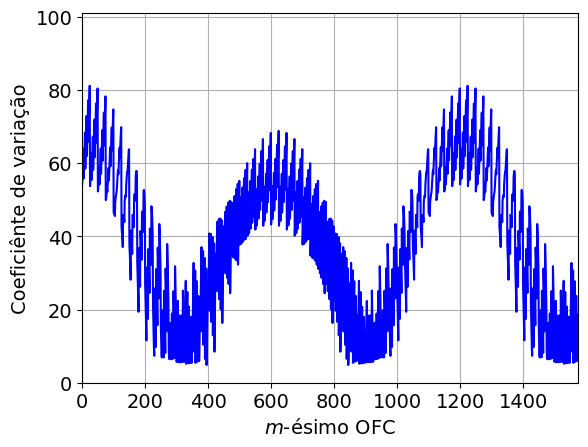

In [31]:
plt.plot(v_std, 'b')
plt.grid(True)


plt.xlim(0, nv)  # Limites do eixo x
plt.ylim(0, 101) # Limites do eixo y

# Configuração do tamanho da fonte
plt.rcParams.update({'font.size': 14})  # Altere o tamanho da fonte conforme necessário

# Adicionando rótulos aos eixos e título
plt.xlabel('$m$-ésimo OFC')
plt.ylabel('Coeficiênte de variação')
#plt.title('Gráfico com Grid e Tamanho de Letra Controlado')

# Exibindo o gráfico
plt.show()

<StemContainer object of 3 artists>

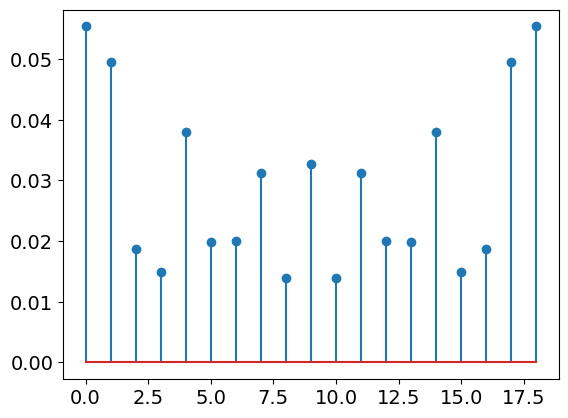

In [32]:
# Testar valores de Ax e Delta_UDC MZM

iAa = 10.2
iAb = 10.7
D_udc  = 1.8
v_mz1 = []
#ind_m1  =
for m in ind_m:
    J_mAa = besselj(m,iAa)
    J_mAb = besselj(m,iAb)
    temp2 = J_mAa**2 + J_mAb**2  + 2*J_mAa*J_mAb*cos(pi*D_udc/Vpi_mz1)
    v_mz1.append(temp2)
#    print(temp2)

plt.stem(v_mz1)